
# MNIST:
https://en.wikipedia.org/wiki/MNIST_database

gray scale image of numbers from 0 to 9
shape: 28*28,

60,000 train (28*28),
10,000 test,
10 class (numbers 0 ta 9),

In [1]:
from keras.datasets import mnist # dataset mnist
import matplotlib.pyplot as plt

from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical 
#from keras.utils import to_categorical

In [2]:
(train_images, train_labels),(test_images, test_labels)=mnist.load_data() 

In [3]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [4]:
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


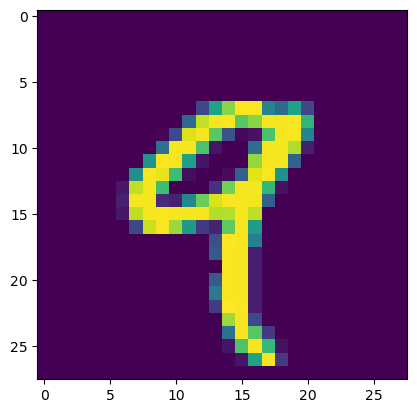

In [5]:
# a sample from dataset
img4=train_images[4] 
plt.imshow(img4)
plt.show()

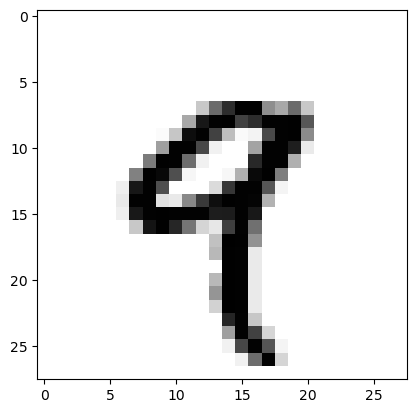

In [6]:
plt.imshow(img4, cmap=plt.cm.binary) # be sorate binary
plt.show()

 # preprossecing

In [7]:
# array + normalization
train_images=train_images.reshape((60000,28*28)) 
train_images=train_images.astype('float32')/255 # float & normalizition

test_images=test_images.reshape((10000,28*28)) 
test_images=test_images.astype('float32')/255 

In [8]:
# labels to categorical
from tensorflow.keras.utils import to_categorical


train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

# network artichecture: sequential

In [9]:
network=models.Sequential() 

network.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
network.add(layers.Dense(10, activation='softmax')) 

In [10]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# training

In [12]:
network.compile(optimizer='rmsprop',  
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network_history=network.fit(train_images,train_labels,validation_split=0.3, epochs=5,batch_size=128)

Epoch 1/5
329/329 [==============================] - 13s 33ms/step - loss: 0.0421 - accuracy: 0.9878 - val_loss: 0.0454 - val_accuracy: 0.9857
Epoch 2/5
329/329 [==============================] - 10s 32ms/step - loss: 0.0299 - accuracy: 0.9912 - val_loss: 0.0497 - val_accuracy: 0.9852
Epoch 3/5
329/329 [==============================] - 11s 34ms/step - loss: 0.0224 - accuracy: 0.9933 - val_loss: 0.0491 - val_accuracy: 0.9851
Epoch 4/5
329/329 [==============================] - 10s 30ms/step - loss: 0.0167 - accuracy: 0.9953 - val_loss: 0.0485 - val_accuracy: 0.9854
Epoch 5/5
329/329 [==============================] - 11s 32ms/step - loss: 0.0122 - accuracy: 0.9967 - val_loss: 0.0517 - val_accuracy: 0.9854


# validation and loss checking

In [14]:
network_history

# test va predict

In [19]:
test_loss, test_acc=network.evaluate(test_images,test_labels)
print ('\ntest_loss: ',test_loss, '\ttest_acc: ', test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0722 - accuracy: 0.9798

test_loss:  0.07224742323160172 	test_acc:  0.9797999858856201
